# Preprocessing

Installation de ffmpeg est necessaire:
https://www.geeksforgeeks.org/how-to-install-ffmpeg-on-windows/

In [1]:
# verify ffmpeg is installed
import os

os.system("ffmpeg -version")

0

In [2]:
import os

samples_path = os.path.join('..','fr', 'clips')
processed_path = os.path.join('..', 'fr', 'processed')
sample = os.listdir(samples_path)[0]
sample

'common_voice_fr_40871135.mp3'

## Convertion dans un format standard

convertion au format WAV

In [ ]:
# from .mp3 to wav
from pydub import AudioSegment

def mp3_to_wav(clip_name) -> AudioSegment:
    clip_name = clip_name.split('.')[0]
    clip = AudioSegment.from_mp3(os.path.join(samples_path, f'{clip_name}.mp3'))
    # clip.export(os.path.join(processed_path, f'{clip_name}.wav'), format='wav')
    return clip
    

## Normalisation de la fréquence d'échantillonnage

La fréquence d'échantillonnage est normalisée à 44.1 kHz

Sample rate: 44100


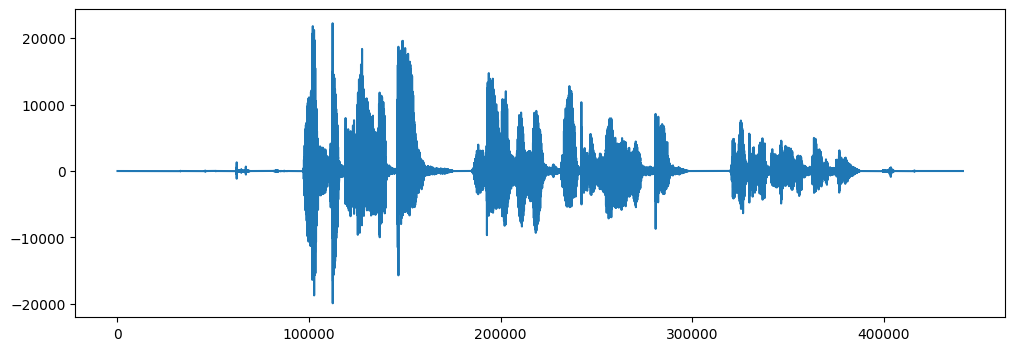

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_frequency(clip: AudioSegment| str):
    if isinstance(clip, str):
        clip = AudioSegment.from_wav(os.path.join(processed_path, f'{clip}.wav'))

    samples = np.array(clip.get_array_of_samples())
    sample_rate = clip.frame_rate
    print(f"Sample rate: {sample_rate}")
    plt.figure(figsize=(12, 4))
    plt.plot(samples)
    plt.show()

def normalize_frequency(clip: AudioSegment | str) -> AudioSegment:
    if isinstance(clip, str):
        clip = AudioSegment.from_wav(os.path.join(processed_path, f'{clip}.wav'))
    clip = clip.set_frame_rate(44100)
    return clip

# clip_name = normalize_frequency(sample)
# plot_frequency(clip_name)

## Pas de stereo

Sample rate: 44100


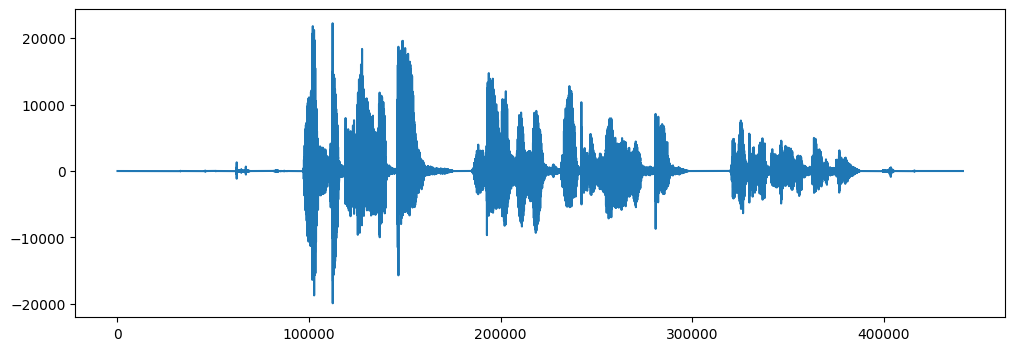

In [ ]:
def stereo_to_mono(clip: AudioSegment | str) -> AudioSegment:
    if isinstance(clip, str):
        clip = clip.split('.')[0]
        clip = AudioSegment.from_wav(os.path.join(processed_path, f'{clip}.wav'))

    clip = clip.set_channels(1)
    # clip.export(os.path.join(processed_path, f'{final_name_mono}.wav'), format='wav')
    return clip

# clip_name = stereo_to_mono(sample.split('.')[0]+ '_normalized')
# plot_frequency(clip_name)

## Normalisation des volumes

In [ ]:
# normalize volume
def normalize_volume(clip: AudioSegment | str, base_clip: AudioSegment | str) -> AudioSegment:
    if isinstance(clip, str):
        clip = clip.split('.')[0]
        clip = AudioSegment.from_wav(os.path.join(processed_path, f'{clip}.wav'))
    if isinstance(base_clip, str):
        base_clip = base_clip.split('.')[0]
        base_clip = AudioSegment.from_wav(os.path.join(processed_path, f'{base_clip}.wav'))
    
    diff = base_clip.dBFS - clip.dBFS
    clip = clip.apply_gain(diff)
    return clip


## Processing complet d'un echantillon

In [ ]:
def normalize_sample(clip: AudioSegment | str, base_clip: AudioSegment | str) -> AudioSegment:
    if isinstance(clip, str):
        clip = clip.split('.')[0]
        clip = AudioSegment.from_wav(os.path.join(processed_path, f'{clip}.wav'))
    if isinstance(base_clip, str):
        base_clip = base_clip.split('.')[0]
        base_clip = AudioSegment.from_wav(os.path.join(processed_path, f'{base_clip}.wav'))
    
    clip = mp3_to_wav(clip)
    clip = normalize_frequency(clip)
    clip = stereo_to_mono(clip)
    clip = normalize_volume(clip, base_clip)
    return clip